<a href="https://colab.research.google.com/github/riti1302/Digit_Recognition/blob/master/Digit_recognition_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

model = Sequential()

model.add(LSTM(128, input_shape = (x_train.shape[1:]), activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax'))

opt = tf.keras.optimizers.Adam(lr = 1e-3, decay = 1e-5)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3, validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 328s 5ms/step - loss: 0.6222 - acc: 0.7999 - val_loss: 0.1848 - val_acc: 0.9465
Epoch 2/3
60000/60000 [==============================] - 326s 5ms/step - loss: 0.1629 - acc: 0.9557 - val_loss: 0.1221 - val_acc: 0.9612
Epoch 3/3
60000/60000 [==============================] - 326s 5ms/step - loss: 0.1150 - acc: 0.9691 - val_loss: 0.0664 - val_acc: 0.9794


In [0]:
LOG_DIR = 'logs'

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

import os
if not os.path.exists(LOG_DIR):
  os.makedirs(LOG_DIR)
  
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2018-12-17 06:56:03--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.206.253.53, 34.232.181.106, 34.206.9.96, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.206.253.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  --.-KB/s    in 0.1s    

2018-12-17 06:56:03 (47.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://f93a7b64.ngrok.io


Add the tensorbaord lines in the trainning cell. Path should be taken care of.

In [0]:
saved_model_path = tf.contrib.saved_model.save_keras_model(model, "./Mnist_RNN_model")


Consider using a TensorFlow optimizer from `tf.train`.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./Mnist_RNN_model/temp-b'1545029949'/saved_model.pb


In [0]:
new_model = tf.contrib.saved_model.load_keras_model(saved_model_path)

In [0]:
predictions = new_model.predict([x_test])

In [0]:
import numpy as np

print(np.argmax(predictions[54]))

6


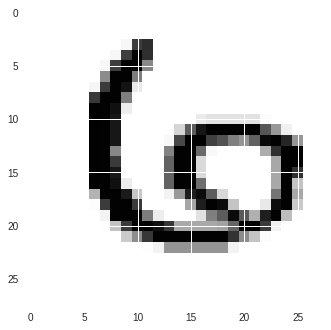

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_test[54])
plt.show()